In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np


In [21]:
def next_step_probability(current_i, current_j, sigma_i, sigma_j, size):
    grid_ii, grid_jj = np.mgrid[0:size, 0:size]
    rad = (
        (((grid_ii - current_i) ** 2) / (sigma_i ** 2))
        + (((grid_jj - current_j) ** 2)/ (sigma_j ** 2))
    )

    p_next_step = np.exp(-(rad / 2.0)) / (2.0 * np.pi * sigma_i * sigma_j)
    return p_next_step / p_next_step.sum()


def compute_selection_map(next_step_map, activation_map):
    selection_map = next_step_map * activation_map
    selection_map /= selection_map.sum()
    return selection_map


def sample_next_step(current_i, current_j, sigma_i, sigma_j, activation_map, random_state=np.random):
    size = activation_map.shape[0]
    next_step_map = next_step_probability(current_i, current_j, sigma_i, sigma_j, size)
    selection_map = compute_selection_map(next_step_map, activation_map)

    r = random_state.rand()
    cumulative_map = np.cumsum(selection_map)
    cumulative_map = cumulative_map.reshape(selection_map.shape)
    i_next, j_next = np.argwhere(cumulative_map >= r)[0]

    return i_next, j_next


def evaluate_position(current_i, current_j, sigma_i, sigma_j, activation_map):
    size = activation_map.shape[0]
    next_step_map = next_step_probability(current_i, current_j, sigma_i, sigma_j, size)
    selection_map = compute_selection_map(next_step_map, activation_map)
    return selection_map[current_i, current_j]


def create_activation_map(size, map_type='flat'):
    if map_type == 'flat':
        activation_map = np.ones((size, size))
    elif map_type == 'hills':
        grid_ii, grid_jj = np.mgrid[0:size, 0:size]
        i_waves = np.sin(grid_ii/130) + np.sin(grid_ii/10)
        i_waves /= i_waves.max()
        j_waves = np.sin(grid_jj/100) + np.sin(grid_jj/50)+ np.sin(grid_jj/10)
        j_waves /= j_waves.max()
        activation_map = j_waves+i_waves
    elif map_type == 'labyrinth':
        activation_map = np.ones((size, size))
        activation_map[50:100, 50:60] = 0
        activation_map[20:89, 80:90] = 0
        activation_map[90:120, 0:10] = 0
        activation_map[120:size, 30:40] = 0
        activation_map[180:190, 50:60] = 0

        activation_map[50:60, 50:200] = 0
        activation_map[179:189, 80:130] = 0
        activation_map[110:120, 0:190] = 0
        activation_map[120:size, 30:40] = 0
        activation_map[180:190, 50:60] = 0
    activation_map /= activation_map.sum()
    return activation_map




# smells
# current_i, current_j, sigma_i, sigma_j needed all over the place
# not efficient: mgrid calculated every time
# defining the parameters of a run is tedious: define all the single variables
# need to do the bookkeeping for i, j in case you want to create / simulate entire trajectories
# changing the next step probability is going to be trouble
# adding a new activation map requires adding a new piece to the code
# what if map_type is not any of the 3?

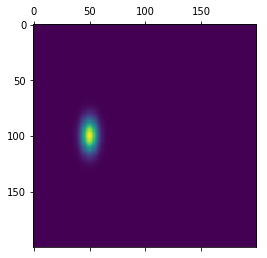

In [3]:
p_next_step = next_step_probability(100, 50, 10, 5, 200)
plt.matshow(p_next_step)

In [4]:
initial_act = np.ones((200, 200))
initial_act[50:100, 50:60] = 0
initial_act[20:89, 80:90] = 0
initial_act[90:120, 0:10] = 0
initial_act[120:200, 30:40] = 0
initial_act[180:190, 50:60] = 0

initial_act[50:60, 50:200] = 0
initial_act[179:189, 80:130] = 0
initial_act[110:120, 0:190] = 0
initial_act[120:200, 30:40] = 0
initial_act[180:190, 50:60] = 0

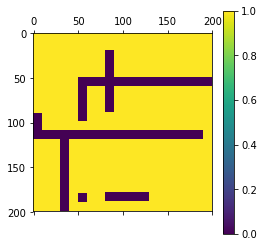

In [5]:
plt.matshow(initial_act)
plt.colorbar()

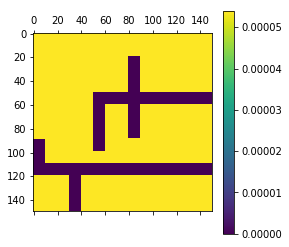

In [27]:
activation_map = create_activation_map(150, 'labyrinth')
plt.matshow(activation_map)
plt.colorbar()

In [28]:
i, j = 100, 50
sigma_i, sigma_j = 3, 4
size = 200
activation_map = create_activation_map(size, 'labyrinth')

trajectory = []
for _ in range(1000):
    i, j = sample_next_step(i, j, sigma_i, sigma_j, activation_map)
    trajectory.append((i, j))

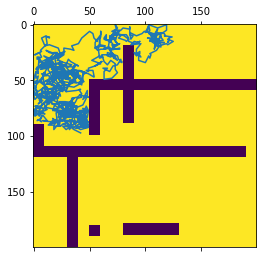

In [29]:
trajectory = np.array(trajectory)
plt.matshow(initial_act)
plt.plot(trajectory[:, 1], trajectory[:, 0])